In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**정류소데이터**

In [3]:
import os

path = '/content/drive/MyDrive/project/name/'
forders = os.listdir('/content/drive/MyDrive/project/name')
col_name = ['대여소번호', '보관소명', '시군구', '상세주소', '위도', '경도', '설치시기', 'LCD설치대수', 'QR설치대수', '운영방식']

# 데이터 가져오기
for file in forders:
  df_name = pd.read_csv(path + file, encoding='cp949', names=col_name, skiprows=5)
  print(df_name.shape)

# 설치대수 정리
df_name = df_name.fillna(0)
df_name['총설치대수'] = df_name['LCD설치대수'] + df_name['QR설치대수']
df_name.drop(['LCD설치대수', 'QR설치대수'], axis=1, inplace=True)

# 시간값 수정하기
df_name['설치시기'] = pd.to_datetime(df_name['설치시기'], errors='coerce')

(5372, 10)


In [4]:
where_data = df_name[['대여소번호', '총설치대수', '위도', '경도','시군구']]
where_data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
where_data

<ipython-input-4-f1aab2e57d1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  where_data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)


,대여소번호,총설치대수,위도,경도,시군구
0,301,20.0,37.575794,126.971451,종로구
1,302,12.0,37.575947,126.974060,종로구
2,303,8.0,37.571770,126.974663,종로구
3,305,16.0,37.572559,126.978332,종로구
4,307,11.0,37.570000,126.971100,종로구
...,...,...,...,...,...
5327,4892,10.0,37.525970,127.118210,송파구
5329,4894,6.0,37.486324,127.115089,송파구
5333,4901,6.0,37.507084,127.064598,강남구
5360,5082,10.0,37.560196,126.854912,강서구


**분석데이터**

In [5]:
import os
os.listdir('/content/drive/MyDrive/project/eda')

['data1.csv']

In [6]:
path = '/content/drive/MyDrive/project/eda/'
forders = os.listdir('/content/drive/MyDrive/project/eda')
df_raw = pd.DataFrame()

for file in forders:
  df_raw = pd.read_csv(path + file)
  print(df_raw.shape)

(5293761, 20)


In [7]:
df_raw.rename(columns={'return_hour':'return_day',
                       'return_hour.1' : 'return_time'},
              inplace=True)

In [8]:
df_raw

,rent_num,return_num,use_time,use_distance,user,use_age,use_sex,rent_day,rent_time,return_day,return_time,week,rent_city,rent_lat,rent_long,rent_bikenum,return_city,return_lat,return_long,return_bikenum
0,230,3206,6,6,내국인,2001,1,2022-10-03,6,2022-10-03,6,0,영등포구,37.524635,126.896217,13.0,영등포구,37.517071,126.899086,15.0
1,230,3206,6,6,내국인,2001,1,2022-10-03,6,2022-10-03,6,0,영등포구,37.524635,126.896217,13.0,영등포구,37.517071,126.899086,15.0
2,230,3206,6,6,내국인,2001,1,2022-10-03,6,2022-10-03,6,0,영등포구,37.524635,126.896217,10.0,영등포구,37.517071,126.899086,15.0
3,230,3206,6,6,내국인,2001,1,2022-10-03,6,2022-10-03,6,0,영등포구,37.524635,126.896217,10.0,영등포구,37.517071,126.899086,15.0
4,949,933,7,7,내국인,1995,0,2022-10-03,6,2022-10-03,6,0,은평구,37.619781,126.920807,6.0,은평구,37.612484,126.914879,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293756,138,140,161,161,내국인,1994,2,2022-09-30,11,2022-09-30,14,4,서대문구,37.559177,126.934524,10.0,서대문구,37.560009,126.940735,22.0
5293757,3214,279,169,169,내국인,1993,2,2022-09-30,11,2022-09-30,14,4,영등포구,37.512024,126.901054,10.0,영등포구,37.513229,126.904465,15.0
5293758,3214,279,169,169,내국인,1993,2,2022-09-30,11,2022-09-30,14,4,영등포구,37.512024,126.901054,10.0,영등포구,37.513229,126.904465,15.0
5293759,3214,279,169,169,내국인,1993,2,2022-09-30,11,2022-09-30,14,4,영등포구,37.512024,126.901054,10.0,영등포구,37.513229,126.904465,15.0


In [9]:
df = df_raw.copy()
#df.reset_index(inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293761 entries, 0 to 5293760
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   rent_num        int64  
 1   return_num      int64  
 2   use_time        int64  
 3   use_distance    int64  
 4   user            object 
 5   use_age         int64  
 6   use_sex         int64  
 7   rent_day        object 
 8   rent_time       int64  
 9   return_day      object 
 10  return_time     int64  
 11  week            int64  
 12  rent_city       object 
 13  rent_lat        float64
 14  rent_long       float64
 15  rent_bikenum    float64
 16  return_city     object 
 17  return_lat      float64
 18  return_long     float64
 19  return_bikenum  float64
dtypes: float64(6), int64(9), object(5)
memory usage: 807.8+ MB


In [10]:
# 결측치 확인
# df.isnull().sum()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


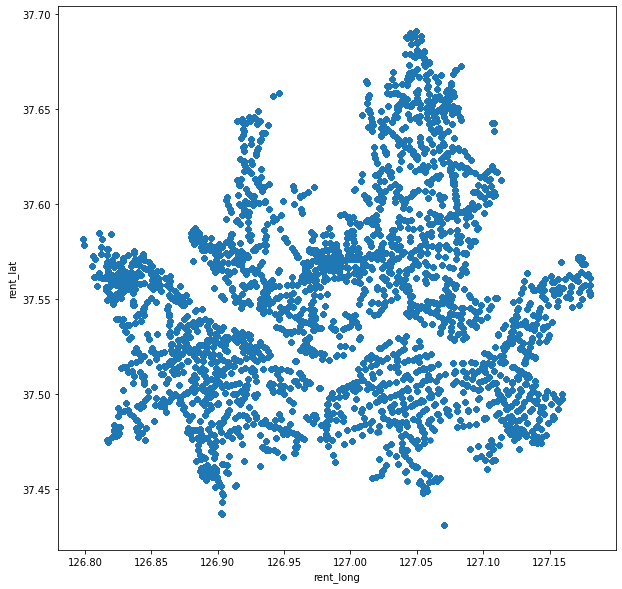

In [11]:
# 대여점 분석
fig, ax = plt.subplots(figsize=(10,10))
df.plot.scatter(x='rent_long',y='rent_lat',ax=ax)
plt.show()

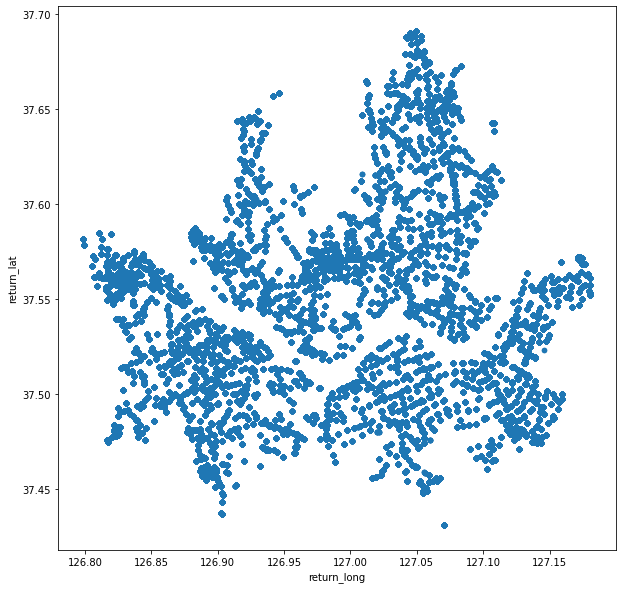

In [12]:
# 반납점 분석
fig, ax = plt.subplots(figsize=(10,10))
df.plot.scatter(x='return_long',y='return_lat',ax=ax)
plt.show()

**대여개수 확인**

In [13]:
df['rent_time'].value_counts()

8     1676199
7     1066235
9      860087
11     700987
10     630232
6      360021
Name: rent_time, dtype: int64

In [14]:
# 빌린사람
num_rent = df.groupby(['rent_num','rent_day','rent_time'], as_index=False)['user'].count()
num_rent.columns = ['num','day','hour','rent_person']
num_rent

,num,day,hour,rent_person
0,102,2022-09-01,6,4
1,102,2022-09-01,7,8
2,102,2022-09-01,8,20
3,102,2022-09-01,9,44
4,102,2022-09-01,10,20
...,...,...,...,...
417256,6053,2022-10-24,11,2
417257,6053,2022-10-27,10,2
417258,6053,2022-10-28,7,2
417259,6053,2022-10-31,7,2


In [15]:
num_rent['hour'].unique()

array([ 6,  7,  8,  9, 10, 11])

In [16]:
# 반납한 사람
num_return = df.groupby(['return_num','return_day','return_time'], as_index=False)['user'].count()
num_return.columns = ['num','day','hour','return_person']
num_return

,num,day,hour,return_person
0,102,2022-09-01,6,4
1,102,2022-09-01,7,8
2,102,2022-09-01,8,30
3,102,2022-09-01,9,32
4,102,2022-09-01,10,28
...,...,...,...,...
424178,6053,2022-10-27,10,2
424179,6053,2022-10-28,8,2
424180,6053,2022-10-28,9,2
424181,6053,2022-10-31,8,2


In [17]:
num_return['hour'].unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [18]:
# 합치기
num_total = pd.merge(num_rent, num_return, on=['num','day','hour'])
num_total['total_person'] = num_total['return_person']-num_total['rent_person']
num_total

,num,day,hour,rent_person,return_person,total_person
0,102,2022-09-01,6,4,4,0
1,102,2022-09-01,7,8,8,0
2,102,2022-09-01,8,20,30,10
3,102,2022-09-01,9,44,32,-12
4,102,2022-09-01,10,20,28,8
...,...,...,...,...,...,...
295408,5859,2022-10-28,8,2,6,4
295409,5859,2022-10-31,8,4,7,3
295410,5859,2022-10-31,11,2,2,0
295411,6053,2022-10-24,8,2,2,0


In [19]:
#num_total[num_total['total_person'] < 0]

In [20]:
num_total2 = pd.merge(num_total, where_data, left_on=['num'], right_on=['대여소번호'])
num_total2.drop(['대여소번호'], axis=1, inplace=True)
num_total2['총설치대수'] = num_total2['총설치대수'].astype(int)
num_total2

,num,day,hour,rent_person,return_person,total_person,총설치대수,위도,경도,시군구
0,102,2022-09-01,6,4,4,0,15,37.555649,126.910629,마포구
1,102,2022-09-01,7,8,8,0,15,37.555649,126.910629,마포구
2,102,2022-09-01,8,20,30,10,15,37.555649,126.910629,마포구
3,102,2022-09-01,9,44,32,-12,15,37.555649,126.910629,마포구
4,102,2022-09-01,10,20,28,8,15,37.555649,126.910629,마포구
...,...,...,...,...,...,...,...,...,...,...
326131,5859,2022-10-28,8,2,6,4,10,37.525394,126.930458,영등포구
326132,5859,2022-10-31,8,4,7,3,10,37.525394,126.930458,영등포구
326133,5859,2022-10-31,11,2,2,0,10,37.525394,126.930458,영등포구
326134,6053,2022-10-24,8,2,2,0,5,37.560925,126.990662,중구


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


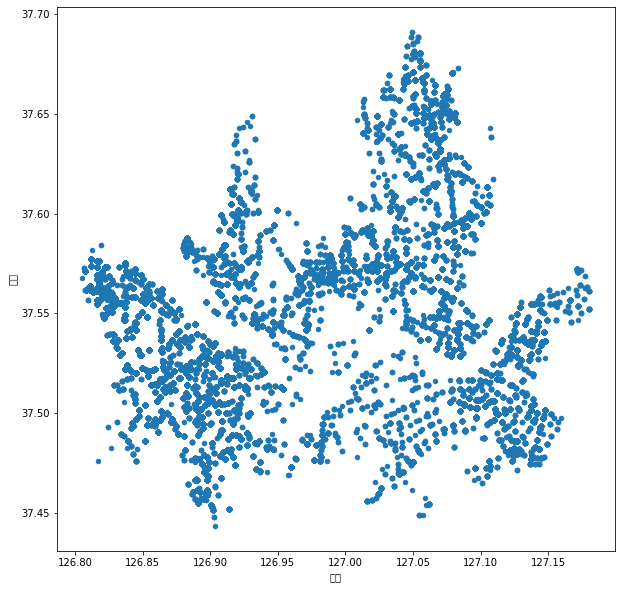

In [21]:
# 설치대수가 부족한 곳들의 위치
aaa = num_total2[(num_total2['total_person'] + num_total2['총설치대수']) < 0]
fig, ax = plt.subplots(figsize=(10,10))
aaa.plot.scatter(x='경도',y='위도',ax=ax)
plt.show()

**시간별 데이터 확인**

In [22]:
num_total2 = num_total2[['num', '위도', '경도', '시군구', '총설치대수', 'day', 'hour', 'rent_person', 'return_person', 'total_person']]
num_total2

,num,위도,경도,시군구,총설치대수,day,hour,rent_person,return_person,total_person
0,102,37.555649,126.910629,마포구,15,2022-09-01,6,4,4,0
1,102,37.555649,126.910629,마포구,15,2022-09-01,7,8,8,0
2,102,37.555649,126.910629,마포구,15,2022-09-01,8,20,30,10
3,102,37.555649,126.910629,마포구,15,2022-09-01,9,44,32,-12
4,102,37.555649,126.910629,마포구,15,2022-09-01,10,20,28,8
...,...,...,...,...,...,...,...,...,...,...
326131,5859,37.525394,126.930458,영등포구,10,2022-10-28,8,2,6,4
326132,5859,37.525394,126.930458,영등포구,10,2022-10-31,8,4,7,3
326133,5859,37.525394,126.930458,영등포구,10,2022-10-31,11,2,2,0
326134,6053,37.560925,126.990662,중구,5,2022-10-24,8,2,2,0


In [23]:
num_total2.groupby(['시군구','hour'], as_index=False)[['rent_person','return_person']].sum().head(30)

,시군구,hour,rent_person,return_person
0,강남구,6,2570,3098
1,강남구,7,16901,18798
2,강남구,8,39371,49293
3,강남구,9,22490,29037
4,강남구,10,12560,14002
5,강남구,11,16054,15486
6,강동구,6,10321,7455
7,강동구,7,47170,37747
8,강동구,8,70119,66293
9,강동구,9,32429,32052


In [24]:
time_6 = num_total2[num_total2['hour']==6]
time_7 = num_total2[num_total2['hour']==7]
time_8 = num_total2[num_total2['hour']==8]
time_9 = num_total2[num_total2['hour']==9]
time_10 = num_total2[num_total2['hour']==10]
time_11 = num_total2[num_total2['hour']==11]

In [25]:
# 오전 7시에 위치해서, 10시까지 변동없음을 가정
time_7['현재보유대수']= time_7['총설치대수'] + time_7['total_person']
time_7

<ipython-input-25-bd019a6ae616>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_7['현재보유대수']= time_7['총설치대수'] + time_7['total_person']


,num,위도,경도,시군구,총설치대수,day,hour,rent_person,return_person,total_person,현재보유대수
1,102,37.555649,126.910629,마포구,15,2022-09-01,7,8,8,0,15
7,102,37.555649,126.910629,마포구,15,2022-09-02,7,28,12,-16,-1
36,102,37.555649,126.910629,마포구,15,2022-09-13,7,20,12,-8,7
41,102,37.555649,126.910629,마포구,15,2022-09-14,7,8,4,-4,11
52,102,37.555649,126.910629,마포구,15,2022-09-16,7,24,12,-12,3
...,...,...,...,...,...,...,...,...,...,...,...
326095,5858,37.516693,126.908073,영등포구,10,2022-10-25,7,40,12,-28,-18
326101,5858,37.516693,126.908073,영등포구,10,2022-10-26,7,50,12,-38,-28
326107,5858,37.516693,126.908073,영등포구,10,2022-10-27,7,48,10,-38,-28
326112,5858,37.516693,126.908073,영등포구,10,2022-10-28,7,40,10,-30,-20


In [26]:
# 오전 7시에 위치해서, 10시까지 변동없음을 가정
# 인덱스 재설정 https://kminito.tistory.com/74

move = num_total2.pivot(index=['num', '위도', '경도', '시군구', '총설치대수', 'day'], columns='hour', values='total_person')
move.reset_index(inplace=True)
move.columns = ['num', '위도', '경도', '시군구', '총설치대수', 'day', 'move_6', 'move_7', 'move_8', 'move_9', 'move_10', 'move_11']
move = move[['num', '위도', '경도', '시군구', '총설치대수', 'day', 'move_7', 'move_8', 'move_9']]
move

,num,위도,경도,시군구,총설치대수,day,move_7,move_8,move_9
0,102,37.555649,126.910629,마포구,15,2022-09-01,0.0,10.0,-12.0
1,102,37.555649,126.910629,마포구,15,2022-09-02,-16.0,16.0,-8.0
2,102,37.555649,126.910629,마포구,15,2022-09-06,NaN,-4.0,-4.0
3,102,37.555649,126.910629,마포구,15,2022-09-07,NaN,18.0,2.0
4,102,37.555649,126.910629,마포구,15,2022-09-08,NaN,-28.0,12.0
...,...,...,...,...,...,...,...,...,...
100564,5859,37.525394,126.930458,영등포구,10,2022-10-27,NaN,-3.0,NaN
100565,5859,37.525394,126.930458,영등포구,10,2022-10-28,NaN,4.0,NaN
100566,5859,37.525394,126.930458,영등포구,10,2022-10-31,NaN,3.0,NaN
100567,6053,37.560925,126.990662,중구,5,2022-10-24,NaN,0.0,NaN


In [27]:
move['after7'] = move['총설치대수'] + move['move_7']
move['after8'] = move['after7'] + move['move_8']
move['after9'] = move['after8'] + move['move_9']
move

,num,위도,경도,시군구,총설치대수,day,move_7,move_8,move_9,after7,after8,after9
0,102,37.555649,126.910629,마포구,15,2022-09-01,0.0,10.0,-12.0,15.0,25.0,13.0
1,102,37.555649,126.910629,마포구,15,2022-09-02,-16.0,16.0,-8.0,-1.0,15.0,7.0
2,102,37.555649,126.910629,마포구,15,2022-09-06,NaN,-4.0,-4.0,NaN,NaN,NaN
3,102,37.555649,126.910629,마포구,15,2022-09-07,NaN,18.0,2.0,NaN,NaN,NaN
4,102,37.555649,126.910629,마포구,15,2022-09-08,NaN,-28.0,12.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100564,5859,37.525394,126.930458,영등포구,10,2022-10-27,NaN,-3.0,NaN,NaN,NaN,NaN
100565,5859,37.525394,126.930458,영등포구,10,2022-10-28,NaN,4.0,NaN,NaN,NaN,NaN
100566,5859,37.525394,126.930458,영등포구,10,2022-10-31,NaN,3.0,NaN,NaN,NaN,NaN
100567,6053,37.560925,126.990662,중구,5,2022-10-24,NaN,0.0,NaN,NaN,NaN,NaN


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


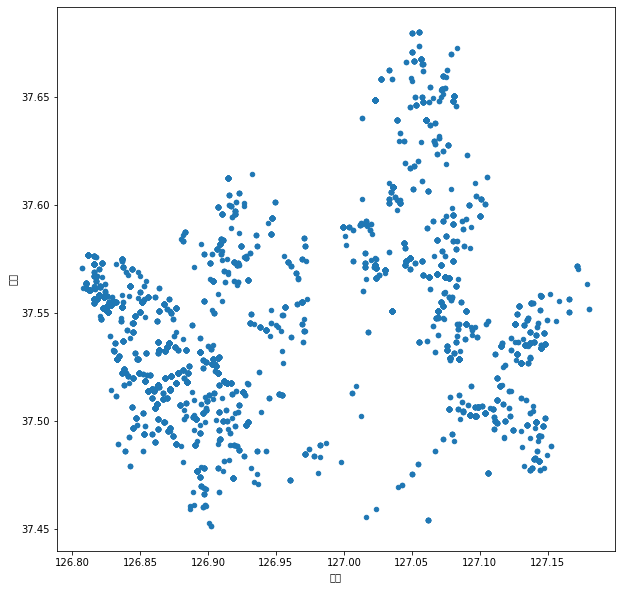

In [28]:
bbb = move[((move['after7'] < -5)&(move['after8'] < -5))]
fig, ax = plt.subplots(figsize=(10,10))
bbb.plot.scatter(x='경도',y='위도',ax=ax)
plt.show()

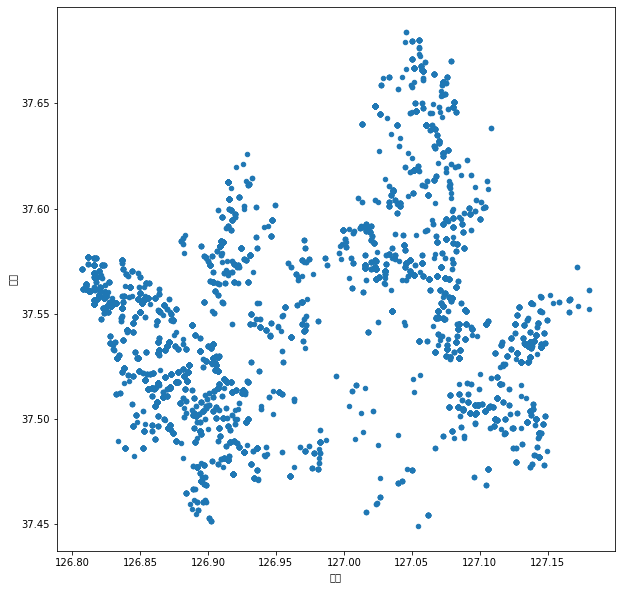

In [29]:
bbb = move[((move['after8'] < -5)&(move['after9'] < -5))]
fig, ax = plt.subplots(figsize=(10,10))
bbb.plot.scatter(x='경도',y='위도',ax=ax)
plt.show()